In [43]:
import re 
import collections 
import numpy as np 
import wordcloud 
from PIL import Image 
import matplotlib.pyplot as plt
import os
import jieba
os.chdir(r'C:\Users\REGGIE\Desktop\work\爬虫')

In [29]:
with open('test.txt','r',encoding = 'utf-8') as f:
    document = f.read()
    document_cut = jieba.cut(document)
    result = ' '.join(document_cut)

In [30]:
result

'四川省 2019 年 企业 工资 指导 线 相关 政策 解读 材料 \xa0 一 、 制定 企业 工资 指导 线 的 主要 政策 依据 \xa0 按照 《 国务院 关于 改革 国有企业 工资 决定 机制 的 意见 》 （ 国 发 〔 2018 〕 16 号 ） 、 《 四川省人民政府 关于 改革 国有企业 工资 决定 机制 的 实施 意见 》 （ 川府 发 〔 2018 〕 49 号 ） 、 《 劳动部 关于 印发 试点 地区 工资 指导 线 制度 试行 办法 的 通知 》 （ 劳部发 〔 1997 〕 27 号 ） 和 《 四川省人民政府 关于 印发 四川省 企业 工资 指导 线 制度 试行 办法 的 通知 》 （ 川府 函 〔 2002 〕 295 号 ） 的 有关 规定 ， 结合 四川省 经济社会 发展 情况 ， 制定 四川省 2019 年 企业 工资 指导 线 。 \xa0 二 、 企业 工资 指导 线 的 作用 \xa0 企业 工资 指导 线 制度 是 政府 对 企业 工资 分配 进行 宏观调控 的 一种 制度 ， 是 企业 开展 工资 集体 协商 的 基本 依据 。 其 主要 作用 是 引导 企业 在 生产 发展 、 经济效益 提高 的 基础 上 合理 确定 职工工资 水平 ， 有利于 企业 调节 工资 分配关系 ， 促进 劳动 关系 和谐 稳定 ； 有利于 企业 加强 内部 人工成本 管理 和 促进 工资 集体 协商 制度 的 建立 ， 保障 劳动者 合法权益 。 \xa0 三 、 制定 企业 工资 指导 线 参考 的 主要 因素 \xa0 企业 工资 指导 线 水平 是 根据 国家 和 省 对 企业 工资 分配 宏观调控 的 总体 要求 ， 综合 考虑 经济 增长 、 劳动生产率 、 物价水平 、 企业 承受能力 、 历年 工资 指导 线 水平 、 比较 其他 省 （ 市 、 区 ） 情况 等 相关 因素 来 确定 。 \xa0 四 、 2019 年 企业 工资 指导 线 形成 的 过程 \xa0 为 做好 企业 工资 分配 的 宏观指导 和 调控 ， 推进 企业 工资 集体 协商 ， 促使 企业 工资 分配 与 国家 宏观调控 政策 相 协调 ， 依据 《 劳动部 关于 印发 试点 地区 工资 指导 线 制度 试行 办法 的 通知 》 （ 劳部发

In [34]:
from jieba.analyse import *

In [35]:
#关键词提取
keywords = jieba.analyse.extract_tags(result,topK= 6,withWeight = True)

for keyword,weight in extract_tags(result, topK=10,withWeight=True):
    print('{} {}'.format(keyword, weight))

工资 0.5019568664500271
企业 0.36611574503631433
指导 0.3109248824692683
2019 0.2591819512823848
四川省 0.16504756838612467
基准线 0.1332383711598916
印发 0.12382796364742549
预警线 0.10737829651544716
制度 0.0980175003909756
2018 0.09719323173089431


In [24]:
#将文本中的特殊字符转换为空格替代
for ch in '-#$%^&*()@:{}_+[]~':
    result =result.replace(ch," ")

In [37]:
stpwrdpath = "baidu_stopwords.txt"
stpwrd_dic = open(stpwrdpath,encoding='utf-8')
stpwrd_content = stpwrd_dic.read()
#将停用词表转换为list  
stpwrdlst = stpwrd_content.splitlines()

In [40]:
#分词
seg_list_exact = jieba.cut(document, cut_all = False)
object_list = []
for word in seg_list_exact: # 循环读出每个分词
    if word not in stpwrdlst: # 如果不在去除词库中
        object_list.append(word) # 分词追加到列表

In [51]:
word_counts = collections.Counter(object_list) # 对分词做词频统计
word_counts_top10 = word_counts.most_common(50) # 获取前50最高频的词
print (word_counts_top10) # 输出检查

[('企业', 32), ('工资', 29), ('、', 22), ('，', 22), ('指导', 18), ('线', 18), ('（', 13), ('）', 13), ('\xa0', 11), ('。', 10), ('年', 9), ('四川省', 8), ('2019', 8), ('《', 8), ('制度', 7), ('〔', 6), ('〕', 6), ('号', 6), ('印发', 5), ('发展', 5), ('增长', 5), ('制定', 4), ('试行', 4), ('办法', 4), ('通知', 4), ('分配', 4), ('经济效益', 4), ('基准线', 4), ('政策', 3), ('依据', 3), ('2018', 3), ('四川省人民政府', 3), ('川府', 3), ('情况', 3), ('宏观调控', 3), ('集体', 3), ('协商', 3), ('水平', 3), ('；', 3), ('省', 3), ('社会', 3), ('人力资源', 3), ('上线', 3), ('预警线', 3), ('下线', 3), ('相关', 2), ('改革', 2), ('国有企业', 2), ('机制', 2), ('意见', 2)]


In [67]:
import pandas as pd
data = pd.DataFrame(word_counts_top10)
data.to_csv('word_counts.csv',index = False)

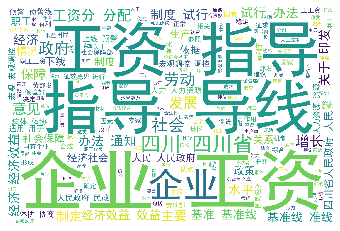

In [68]:
from wordcloud import WordCloud
text = open('test.txt','r',encoding= 'utf-8').read()
words_ls = jieba.cut(text, cut_all=True)
words_split = " ".join(words_ls)
wc = WordCloud(width=1500,height=1000,background_color="#ffffff")
wc.font_path="simhei.ttf"
my_wordcloud = wc.generate(words_split)
plt.imshow(my_wordcloud)
plt.axis("off")
plt.savefig('result.png')
plt.show()